In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
import keras
import random
import shutil
from matplotlib.image import imread
from pathlib import Path
import shutil
import random
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout,BatchNormalization,Dropout
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import files
files.upload()

Saving kaggle-4.json to kaggle-4.json


{'kaggle-4.json': b'{"username":"testkaggle123123","key":"3012faec5be70d0a7299c41cd95e6ed5"}'}

In [ ]:
#kurang
!mkdir ~/.kaggle
!cp kaggle-4.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle-4.json

In [ ]:
!kaggle datasets download -d muniryadi/cat-vs-rabbit

Dataset URL: https://www.kaggle.com/datasets/muniryadi/cat-vs-rabbit
License(s): other
 88% 58.0M/65.9M [00:00<00:00, 151MB/s]
100% 65.9M/65.9M [00:00<00:00, 154MB/s]


In [ ]:
zip_ref = zipfile.ZipFile('/content/cat-vs-rabbit.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

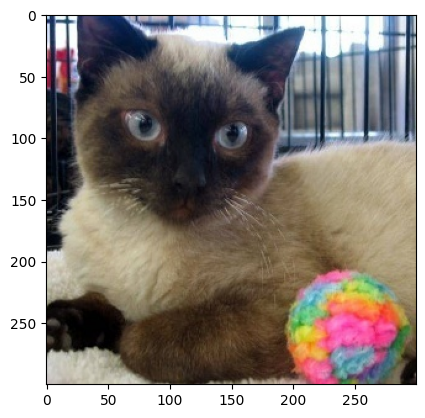

In [ ]:
test = "/content/train-cat-rabbit/cat/cat.1.jpg"
plt.imshow(imread(test))

In [ ]:
test = keras.utils.image_dataset_from_directory(
    directory = '/content/val-cat-rabbit',
    labels='inferred',
    label_mode='int',
    batch_size=40,
    image_size=(100, 100),
)

train = keras.utils.image_dataset_from_directory(
    directory = '/content/train-cat-rabbit',
    labels='inferred',
    label_mode='int',
    batch_size=40,
    image_size=(100, 100),
)

Found 414 files belonging to 2 classes.
Found 1600 files belonging to 2 classes.


In [ ]:
for image_path , label_path in train.take(1):
  print(image_path.shape)
  print(label_path.numpy())

(40, 100, 100, 3)
[1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0
 0 0 0]


In [ ]:
def process(image, label):
  tf.cast(image / 255.0, tf.float32)
  return image, label
train = train.map(process)
test = train.map(process)

In [ ]:
Model = Sequential()
Model.add(Conv2D(32,kernel_size=(3,3),padding = 'valid',activation = 'relu',input_shape = (100,100,3)))

Model.add(MaxPooling2D(pool_size=(2,2),strides=1,padding = 'valid'))
Model.add(Conv2D(128,kernel_size=(3,3),padding = 'valid',activation = 'relu'))
Model.add(MaxPooling2D(pool_size=(2,2),strides=1,padding = 'valid'))

Model.add(Conv2D(64,kernel_size=(3,3),padding = 'valid',activation = 'relu'))
Model.add(MaxPooling2D(pool_size=(2,2),strides=1,padding = 'valid'))

Model.add(Conv2D(32,kernel_size=(3,3),padding = 'valid',activation = 'relu'))
Model.add(MaxPooling2D(pool_size=(2,2),strides=1,padding = 'valid'))

Model.add(Conv2D(16,kernel_size=(3,3),padding = 'valid',activation = 'relu'))
Model.add(MaxPooling2D(pool_size=(2,2),strides=1,padding = 'valid'))

Model.add(Flatten())
Model.add(Dense(128,activation = 'relu'))

Model.add(Dense(1,activation = 'sigmoid'))
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
optimizer = Adam(learning_rate=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

In [ ]:
Model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [ ]:
Model.fit(train ,validation_data=test ,epochs = 20, callbacks=[reduce_lr, early_stop])

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 182ms/step - accuracy: 0.4888 - loss: 188.9876 - val_accuracy: 0.5006 - val_loss: 2.0125 - learning_rate: 0.0010
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.5246 - loss: 1.7386 - val_accuracy: 0.6888 - val_loss: 0.5986 - learning_rate: 0.0010
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.6857 - loss: 0.5819 - val_accuracy: 0.8019 - val_loss: 0.4688 - learning_rate: 0.0010
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.7912 - loss: 0.4827 - val_accuracy: 0.8519 - val_loss: 0.3743 - learning_rate: 0.0010
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.8289 - loss: 0.4162 - val_accuracy: 0.8775 - val_loss: 0.3609 - learning_rate: 0.0010
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.8752 - loss: 0.3357 - val_accuracy: 0.9231 - val_loss: 0.1854 - learning_rate: 0.0010
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.9263 - loss: 0.2001

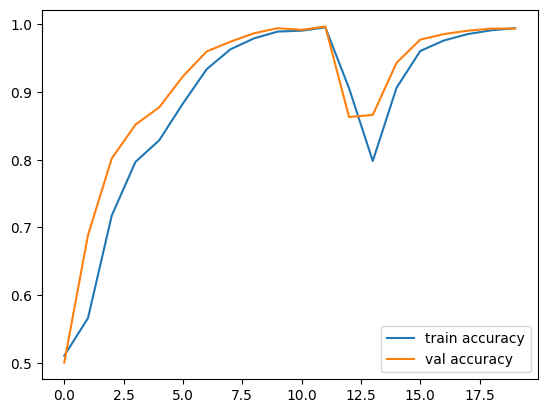

In [ ]:
plt.plot(Model.history.history['accuracy'],label = 'train accuracy')
plt.plot(Model.history.history['val_accuracy'],label = 'val accuracy')
plt.legend()
plt.show()

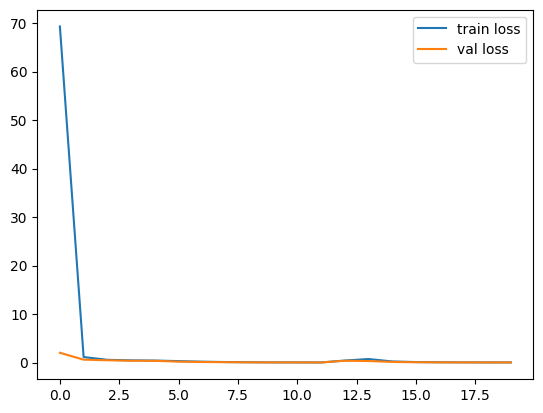

In [ ]:
plt.plot(Model.history.history['loss'],label = 'train loss')
plt.plot(Model.history.history['val_loss'],label = 'val loss')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
import os
converter = tf.lite.TFLiteConverter.from_keras_model(Model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

model_path = 'model_quantized-final-gazael.tflite'
with open(model_path, 'wb') as f:
    f.write(tflite_model)

size_in_bytes = os.path.getsize(model_path)
size_in_mb = size_in_bytes / 1024 / 1024

print(f"Quantized Model Size: {size_in_mb:.2f} MB")

Saved artifact at '/tmp/tmpx4fkbhya'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name='keras_tensor_92')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  136319658211856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136319658210704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136319658208592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136319658209360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136319658208784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136319658207632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136319658207440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136319658208400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136319658207824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136319658206672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13631965820

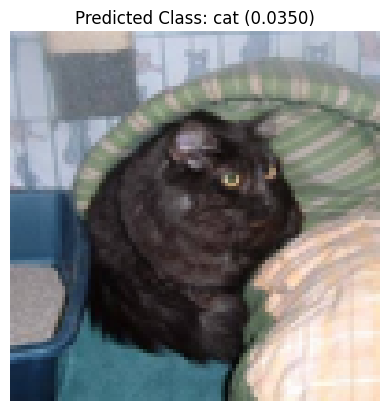

In [ ]:
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

interpreter = tf.lite.Interpreter(model_path="/content/model_quantized-final-gazael.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

image_path = '/content/train-cat-rabbit/cat/cat.103.jpg'
img = Image.open(image_path)

input_shape = input_details[0]['shape']
target_height, target_width = input_shape[1], input_shape[2]
expected_channels = input_shape[3]

img = img.resize((target_width, target_height))

img_array = np.array(img).astype(np.float32) / 255.0

if expected_channels == 1:
    img_array = np.mean(img_array, axis=-1, keepdims=True)

img_array = np.expand_dims(img_array, axis=0)

interpreter.set_tensor(input_details[0]['index'], img_array)
interpreter.invoke()

predictions = interpreter.get_tensor(output_details[0]['index'])

probability = predictions[0][0]

class_labels = ['cat', 'rabbit']

predicted_class = 1 if probability >= 0.5 else 0
predicted_label = class_labels[predicted_class]
plt.title(f"Predicted Class: {predicted_label} ({probability:.4f})")
plt.imshow(img)
plt.axis('off')
plt.show()